In [2]:
#Loading in libraries
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

**Section 1)**
In players dataset, there are 197 observations, and 7 variables. For summary statistics of this dataset's quantitative variables, the mean for played_hours is 5.846, and the mean value for Age is 21.14. 

- experience: Character datatype, describes the level of skill in Minecraft each player has with 5 categories: amateur/beginner/regular/veteran/pro

- subscribe: Logical datatype, states if the individual player is subscribed to the gaming newsletter: True/False

- hashedEmail: Character datatype, states the player's hashed email address to make information secure and private

- played_hours: Double datatype, amount of hours each player has played in Minecraft

- name: Character datatype, states the player's first name 

- gender: Character datatype, states the player's gender: Male/Female/Non-binary/Two-Spirited/Other/Prefer not to say

- Age: Integer datatype, the player's age as a whole number

Some issues that can be seen in in the dataset are that there are missing entries marked by 'NA' and that there are some extreme values in the 'played_hours' variable which skew the data. For other issues, there could be issues with the scale of the data for this varible due to some extreme values. 
The data is collected through players playing the PLAICraft Minecraft game, where the player's gameplay, speech, and key presses are recorded. Each player is given a certain amount of time in their slot and must interact and play with others in order to increase this time (PLAICraft.ai website).

**Section 2)**
Broad question: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

Specific question: Can age predict the number of hours played from the players dataset?

The data will help me address both the broad and specific questions. It is possible that age is a characteristic that can be used to predict how many hours a player will play, and therefore, how much data can be collected from players of different ages. By finding the ages of players with the highest played hours, the researchers will know better which people and demographic to target in recruiting. I will plot a graph and visualize the possible correlation between these two variables, to see what age has the highest played hours. 

The data from players is already tidy as each variable has its own column, each row is its own set of measurements, and each cell contains a single value. To wrangle this data for the visualizations, I will select the relevant columns: Age and played_hours. For the 2 NA values in Age, I will remove these rows as it will not significantly impact the visualization. 

**Section 3)**
Loading in both datasets:

In [3]:
#Initial loading in players and sessisons datasets
players <- read.csv("data/players.csv")
players

sessions <- read.csv("data/sessions.csv")
sessions

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


Computing summary statistics, mean values reported in section 1: 

In [4]:
#Summary statistics for players dataset
psummary <- summary(players)
psummary


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

Wrangling the data for the graph visualization:

In [5]:
#Selecting specific relevant variables in the dataset: hours and age
selectedPlayer <- select(players, played_hours, Age)
selectedPlayer

#Removing the rows with 'NA' values in Age in order to tidy the data
wrangled_player <- selectedPlayer |> drop_na()
wrangled_player


played_hours,Age
<dbl>,<int>
30.3,9
3.8,17
0.0,17
0.7,21
0.1,21
0.0,17
0.0,19
0.0,21
0.1,47


played_hours,Age
<dbl>,<int>
30.3,9
3.8,17
0.0,17
0.7,21
0.1,21
0.0,17
0.0,19
0.0,21
0.1,47


Creating a scatterplot visualization as this suits the data best to demonstrate how spread out the values are.

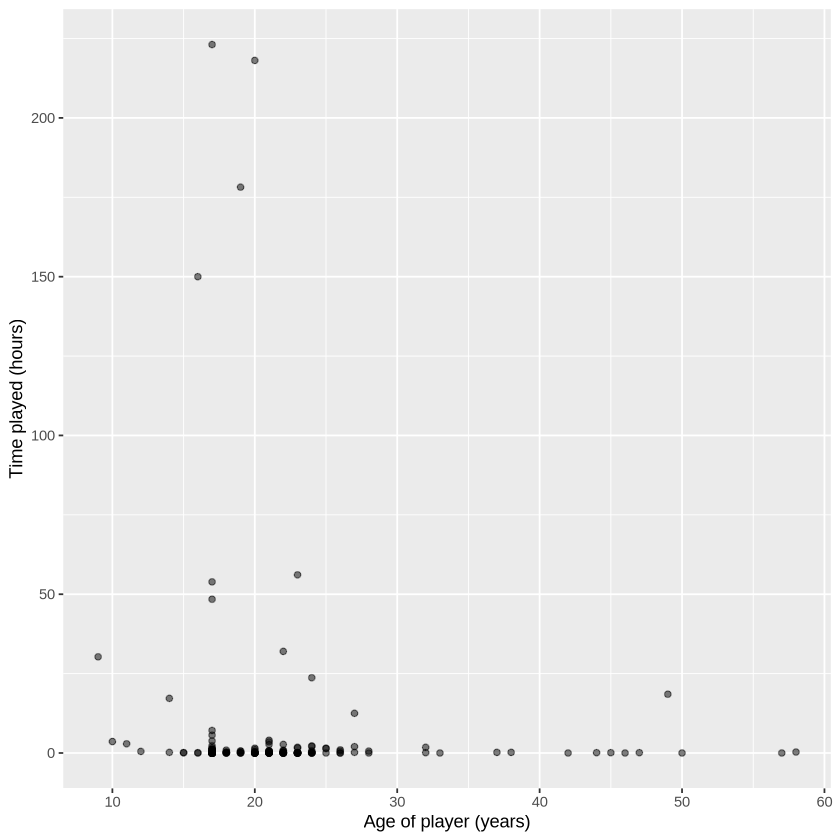

In [14]:
plot1_players <- wrangled_player |>
    ggplot(aes(x = Age, y = played_hours)) +
    geom_point(alpha = 0.5) + 
    xlab("Age of player (years)") +
    ylab("Time played (hours)") 

plot1_players

This scatterplot does not demonstrate a very clear positive/negative trend, or any relationship between the variables. It shows that players around the age of 15-25 played more hours in PlaiCraft, with high values of aroudn 250 hours, and low values of 0. The use of transperancy demonstrates how most of the data points were collected around this same age bracket, but also shows how many values there are for 0 played hours. 

Second visualization:

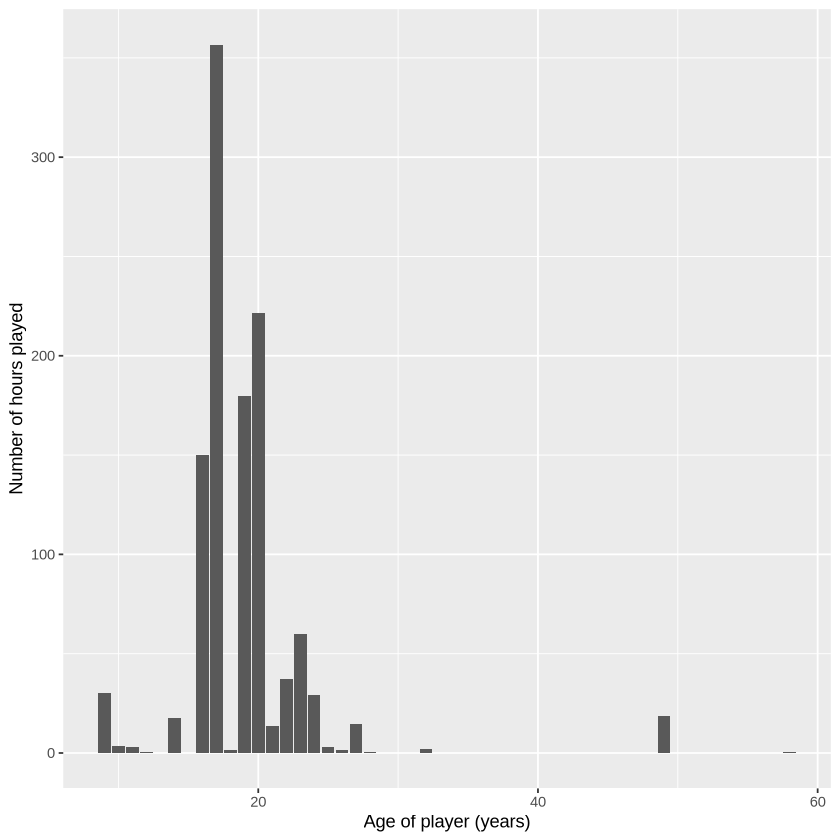

In [29]:
plot2_players <- wrangled_player |>
    ggplot(aes(x = Age, y = played_hours)) +
    geom_bar(stat = "identity") + 
    xlab("Age of player (years)") +
    ylab("Number of hours played")

plot2_players

The above bar chart confirms the interpretation from the first chart, that players in the age range of 15-25 contribute the most data, and that the most hours played was by 17 year-olds collectively. However, it is harder to visualize the amount of data points for 0 hours played, which occured for several players, than the first chart. To improve on this visualization, the ages could be grouped in order to find the best demographic for the researchers. 

In [24]:
mutated_player <- wrangled_player |>
  mutate(age_grouped = cut(Age, breaks = seq(5, 60, by = 5),
  labels = c("5-10", "10-15", "15-20", "20-25", "25-30", "30-35", "35-40", "40-45", "45-50", "50-55", "60-65"),
  right = FALSE))

mutated2_player <- mutated_player |>
  group_by(age_grouped) |>
  summarize(added_hours = sum(played_hours))

mutated2_player

age_grouped,added_hours
<fct>,<dbl>
5-10,30.3
10-15,24.4
15-20,688.2
20-25,361.4
25-30,19.8
30-35,1.9
35-40,0.4
40-45,0.1
45-50,18.7


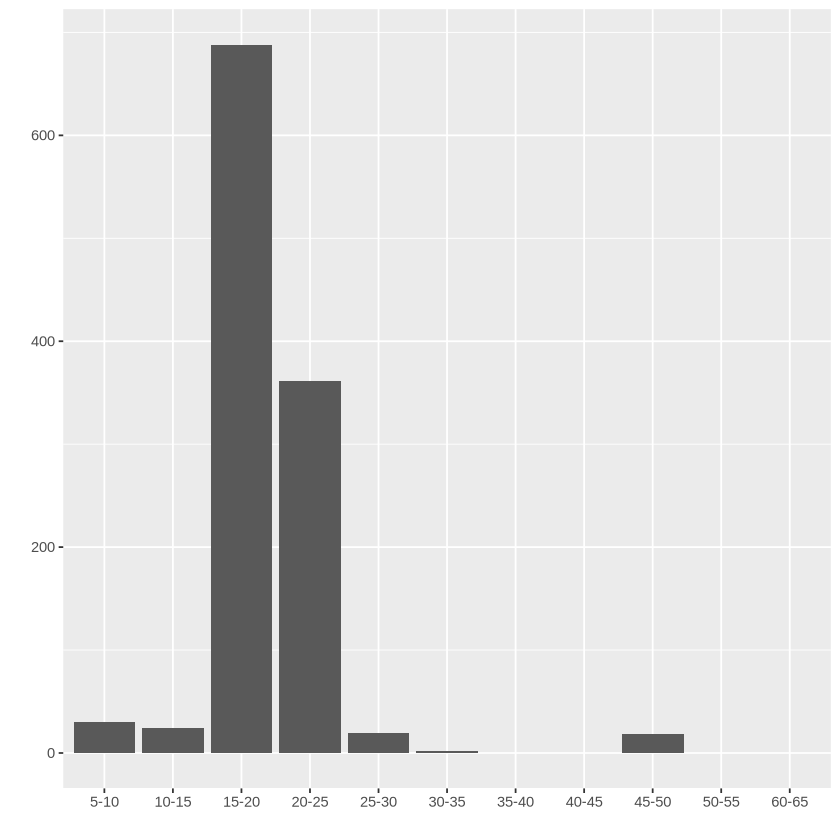

In [31]:
plot3_players <- mutated2_player |>
    ggplot(aes(x = age_grouped, y = added_hours)) +
    geom_bar(stat = "identity") + 
    xlab("") +
    ylab("")

plot3_players